In [3]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

# All timing are in micro seconds (us)

In [4]:
df_columns = ["fp32 M4", "bf16 M4", "bf16 M2", "BF8 M2", "BF8 M0", "BF4 M0"]

In [5]:
df = pd.read_csv("./results/oob_pw.csv")
df = df[df['m'] != 256]
df = df[df['m'] != 3072]

pd.options.display.max_rows = 90
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
df.reset_index(inplace=True, drop = True)
df


,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,utilization_vs_user_grid_perc,utilization_vs_full_grid_perc,run,tflops,voltage,current,power,aiclk,temp,iters
0,f32_m4,512,"(8, 8)",DRAM,DRAM,DRAM,DataType.FLOAT32,MathFidelity.HiFi4,1.26%,1.38%,216.610432,1.239255,0.7600,36.0,26.0,1000.0,54.75000,300
1,f32_m4,1024,"(8, 8)",DRAM,DRAM,DRAM,DataType.FLOAT32,MathFidelity.HiFi4,5.30%,5.78%,412.011147,5.212198,0.7600,39.0,29.0,1000.0,55.43750,300
2,f32_m4,2048,"(8, 8)",DRAM,DRAM,DRAM,DataType.FLOAT32,MathFidelity.HiFi4,9.63%,10.50%,1815.674305,9.461977,0.7600,44.0,34.0,1000.0,55.62500,300
3,f32_m4,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.FLOAT32,MathFidelity.HiFi4,10.66%,11.63%,13112.042745,10.481887,0.7595,54.5,41.5,1000.0,55.15625,300
4,f32_m4,8192,"(8, 8)",DRAM,DRAM,DRAM,DataType.FLOAT32,MathFidelity.HiFi4,15.00%,16.36%,74563.458761,14.745985,0.7500,58.0,45.0,981.5,57.93750,300
5,f16_m4,512,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,1.77%,1.29%,230.815411,1.162988,0.7600,34.0,25.0,1000.0,48.37500,300
6,f16_m4,1024,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,14.25%,10.36%,229.980151,9.337691,0.7600,37.0,27.0,1000.0,48.62500,300
7,f16_m4,2048,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,26.52%,19.28%,988.639196,17.377289,0.7600,42.0,33.0,1000.0,50.56250,300
8,f16_m4,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,35.39%,25.74%,6147.174835,22.358068,0.7550,59.5,45.0,971.5,54.87500,300
9,f16_m4,8192,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,38.77%,28.19%,44894.468784,24.491027,0.7500,59.0,44.0,959.5,56.37500,300


In [6]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

In [7]:
df_inf = get_column_df_info(df, 'run')
df_inf.columns =df_columns
df_inf

,fp32 M4,bf16 M4,bf16 M2,BF8 M2,BF8 M0,BF4 M0
512,216.610432,230.815411,210.941633,214.457512,218.635400,218.743483
1024,412.011147,229.980151,223.553975,212.874413,217.041969,216.138363
2048,1815.674305,988.639196,909.817219,652.227402,611.611207,534.404914
4096,13112.042745,6147.174835,4611.134529,3395.942847,2695.691586,2389.822006
8192,74563.458761,44894.468784,32638.672988,27265.172005,23502.740860,22086.892923


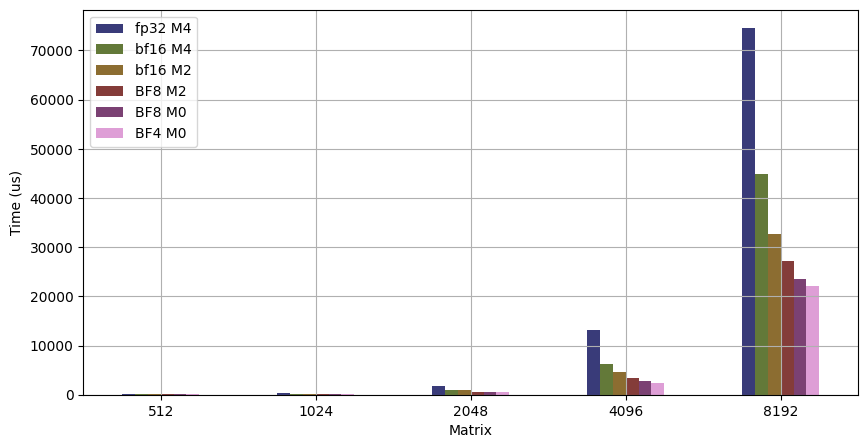

In [8]:
p = df_inf.plot(kind='bar', figsize=(10, 5), colormap="tab20b", rot=0)
p.set_ylabel('Time (us)')
p.set_xlabel('Matrix')
plt.grid(True)
plt.show()

## GFLOPS

In [9]:
df_tflop = get_column_df_info(df, 'tflops')
df_tflop.columns = df_columns
df_tflop

,fp32 M4,bf16 M4,bf16 M2,BF8 M2,BF8 M0,BF4 M0
512,1.239255,1.162988,1.272558,1.251695,1.227777,1.227170
1024,5.212198,9.337691,9.606108,10.088031,9.894324,9.935689
2048,9.461977,17.377289,18.882770,26.340306,28.089526,32.147663
4096,10.481887,22.358068,29.805887,40.471515,50.984673,57.510121
8192,14.745985,24.491027,33.687388,40.326598,46.782273,49.781182


In [10]:
def calculate_matrix_size(m, element_size=2):
    # Calculate the size in bytes
    size_in_bytes = m * m * element_size
    # Convert to megabytes
    size_in_megabytes = size_in_bytes / (1024 * 1024)
    return size_in_megabytes

# Example usage
m = 3072
matrix_size_mb = calculate_matrix_size(m)
print(f"The size of a {m}x{m} matrix is {matrix_size_mb} MB")

The size of a 3072x3072 matrix is 18.0 MB


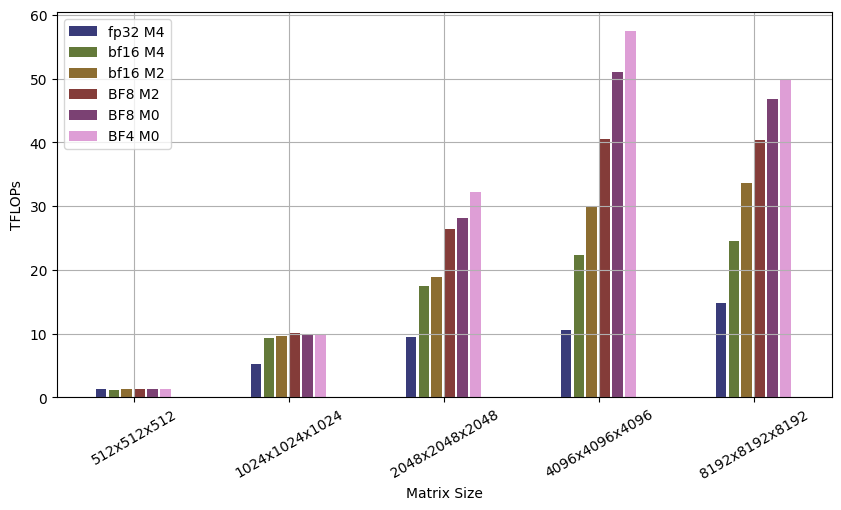

In [11]:
fig, ax = plt.subplots()
p = df_tflop.plot(kind='bar', figsize=(10, 5), colormap="tab20b", rot=0, ax=ax)
# Adjust the width of the bars and the spacing between them
for bar in ax.patches:
    bar.set_width(bar.get_width() * 0.8)

p.set_xticklabels([f"{m}x{m}x{m}" for m in df_tflop.index], rotation=30)
p.set_ylabel('TFLOPs')
p.set_xlabel('Matrix Size')
plt.grid(True)

plt.show()

## Power

In [12]:
df_power = get_column_df_info(df, 'power')
df_power.columns = df_columns
df_power

,fp32 M4,bf16 M4,bf16 M2,BF8 M2,BF8 M0,BF4 M0
512,26.0,25.0,24.0,34.0,33.0,33.0
1024,29.0,27.0,26.0,34.0,33.0,33.0
2048,34.0,33.0,32.0,33.0,33.0,33.0
4096,41.5,45.0,44.0,45.0,33.0,35.0
8192,45.0,44.0,44.0,43.5,43.0,41.0


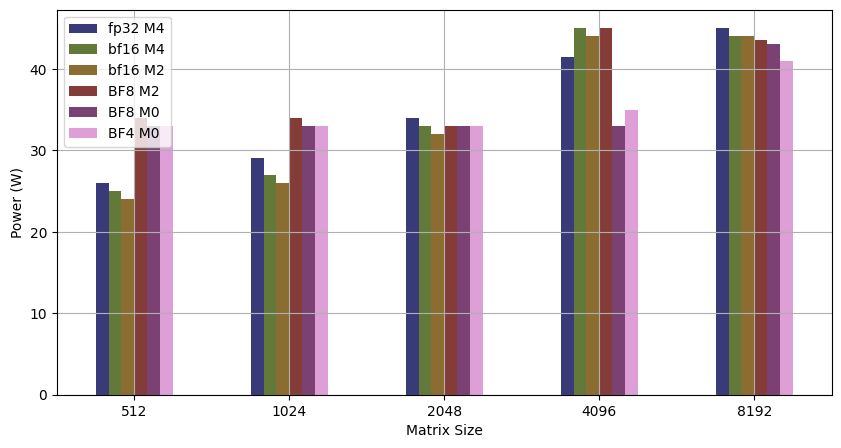

In [13]:
p = df_power.plot(kind='bar', figsize=(10, 5), colormap="tab20b", rot=0)
p.set_xlabel("Matrix Size")
p.set_ylabel("Power (W)")
plt.grid(True)

plt.show()

## GFLOPS per Watt

In [14]:
df_gflops_w = df_tflop / df_power 
df_gflops_w

,fp32 M4,bf16 M4,bf16 M2,BF8 M2,BF8 M0,BF4 M0
512,0.047664,0.046520,0.053023,0.036815,0.037205,0.037187
1024,0.179731,0.345840,0.369466,0.296707,0.299828,0.301081
2048,0.278293,0.526585,0.590087,0.798191,0.851198,0.974172
4096,0.252576,0.496846,0.677407,0.899367,1.544990,1.643146
8192,0.327689,0.556614,0.765622,0.927048,1.087960,1.214175


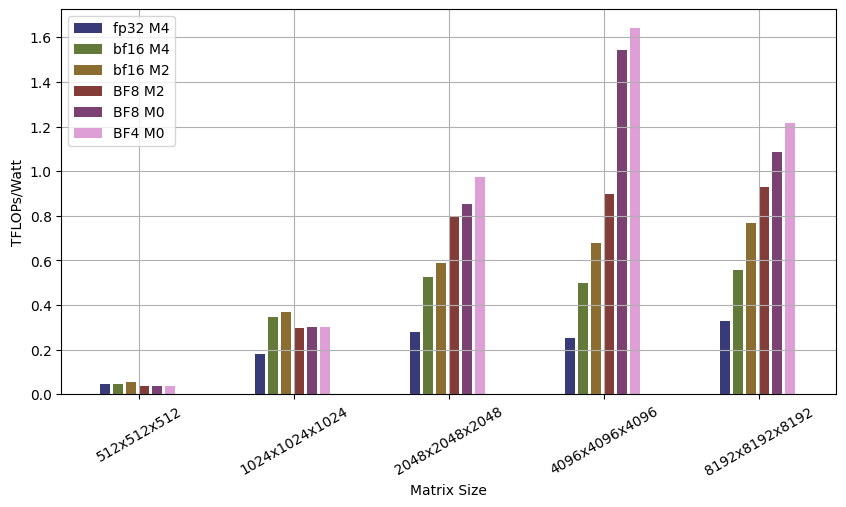

In [15]:
fig, ax = plt.subplots()
p = df_gflops_w.plot(kind='bar', figsize=(10, 5), colormap="tab20b", rot=0, ax=ax)

# for container in ax.containers:
    # labels = [f'{v.get_height():.2f}' for v in container]
    # ax.bar_label(container, labels=labels, padding=5, label_type='edge', fmt='%.2f', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    # ax.bar_label(container, padding=5, label_type='edge', fmt='%.2f')

# Adjust the width of the bars and the spacing between them
for bar in ax.patches:
    bar.set_width(bar.get_width() * 0.8)

p.legend(loc='upper left')
p.set_ylabel('TFLOPs/Watt')
p.set_xticklabels([f"{m}x{m}x{m}" for m in df_gflops_w.index], rotation=30)
p.set_xlabel('Matrix Size')
plt.grid(True)

plt.show()


## TFLOPs per Dollar

In [16]:
conf = 'bfloat16_m4'
gs_cost = 599
df_gflops_d = df_tflop * 1e3 / gs_cost 
df_gflops_d

,fp32 M4,bf16 M4,bf16 M2,BF8 M2,BF8 M0,BF4 M0
512,2.068872,1.941549,2.124471,2.089642,2.049711,2.048698
1024,8.701499,15.588800,16.036908,16.841454,16.518071,16.587128
2048,15.796289,29.010499,31.523823,43.973799,46.894034,53.668887
4096,17.498977,37.325656,49.759410,67.565134,85.116315,96.010219
8192,24.617671,40.886522,56.239378,67.323202,78.100622,83.107148


## 